In [5]:
import pandas as pd
import numpy as np
from urllib.parse import unquote

# Specify the file path using a raw string (add 'r' prefix)
file_path = r'C:\Users\tonyh\Desktop\ADA\ada-2023-project-oddbits\Data\wikispeedia_paths-and-graph\shortest-path-distance-matrix.txt'

# Read the contents of the file excluding lines starting with #
with open(file_path, 'r') as file:
    lines = file.readlines()
    input_matrix = ''.join(line for line in lines if not line.startswith('#'))

# Split the input matrix into rows
rows = input_matrix.strip().split('\n')

# Initialize an empty 2D list to store the distances
distances = []

In [6]:
# Iterate through each row and convert it into a list of integers
for row in rows:
    row_values = []
    for char in row:
        if char.isdigit():
            row_values.append(int(char))
        elif char == '_':
            row_values.append(None)
    distances.append(row_values)

# Convert the distances list to a NumPy array for easier computation
distance_matrix = np.array(distances)

In [32]:
# Compute the centrality for each article using closeness centrality
centrality = []
num_articles = len(distance_matrix)

for i in range(num_articles):
    Farness = sum(distance_matrix[i, j] for j in range(num_articles) if j != i and distance_matrix[i, j] is not None)
    #avg_shortest_path_length = total_distance / (num_articles - 1)  # Exclude the node itself
    closeness_centrality = 100000 / Farness if Farness != 0 else 0
    centrality.append(closeness_centrality)

# Create a DataFrame with article index and centrality values
df_centrality = pd.DataFrame({
    'Article': range(num_articles),
    'Closeness Centrality': centrality
})

# Print the DataFrame
display(df_centrality)

,Article,Closeness Centrality
0,0,7.261109
1,1,7.882084
2,2,7.773632
3,3,7.412898
4,4,7.279610
...,...,...
4599,4599,8.836264
4600,4600,8.287064
4601,4601,7.811279
4602,4602,6.364967


In [33]:
articles_file_path = r'C:\Users\tonyh\Desktop\ADA\ada-2023-project-oddbits\Data\wikispeedia_paths-and-graph\articles.tsv'

# Read the articles from the articles.tsv file
with open(articles_file_path, 'r') as articles_file:
    articles_lines = articles_file.readlines()

# Extract article names from the articles.tsv file
article_names = [unquote(line.strip()) for line in articles_lines if not line.startswith('#') and line.strip() != 'articles']

In [34]:
# Create a DataFrame with article names and centrality values
df_centrality = pd.DataFrame({
    'Article': article_names,
    'Closeness Centrality': centrality
})

# Print the DataFrame
display(df_centrality)

,Article,Closeness Centrality
0,Áedán_mac_Gabráin,7.261109
1,Åland,7.882084
2,Édouard_Manet,7.773632
3,Éire,7.412898
4,Óengus_I_of_the_Picts,7.279610
...,...,...
4599,Zionism,8.836264
4600,Zirconium,8.287064
4601,Zoroaster,7.811279
4602,Zuid-Gelders,6.364967


In [35]:
categories_file_path = r'C:\Users\tonyh\Desktop\ADA\ada-2023-project-oddbits\Data\wikispeedia_paths-and-graph\categories.tsv'

# Read the categories from the categories.tsv file
with open(categories_file_path, 'r') as categories_file:
    categories_lines = categories_file.readlines()

# Create a dictionary to store the first category for each article
article_first_categories = {}
for line in categories_lines:
    if not line.startswith('#'):
        article, *categories = map(str.strip, map(unquote, line.strip().split('\t')))
        first_category = next((cat.split('.')[-1] for cat in categories if cat.startswith('subject.Countries')), None)
        if first_category is None:
            first_category = next((cat.split('.')[-2] for cat in categories if cat.startswith('subject.Countries.')), None)
        if first_category is not None:
            article_first_categories[article] = first_category

In [36]:
# Create a DataFrame with article names, first categories, and centrality values
df_centrality_first_categories = pd.DataFrame({
    'Article': article_names,
    'First Category': [article_first_categories.get(article, None) for article in article_names],
    'Closeness Centrality': centrality
})

# Print the DataFrame
display(df_centrality_first_categories)

,Article,First Category,Closeness Centrality
0,Áedán_mac_Gabráin,None,7.261109
1,Åland,Countries,7.882084
2,Édouard_Manet,None,7.773632
3,Éire,Countries,7.412898
4,Óengus_I_of_the_Picts,None,7.279610
...,...,...,...
4599,Zionism,None,8.836264
4600,Zirconium,None,8.287064
4601,Zoroaster,None,7.811279
4602,Zuid-Gelders,None,6.364967


In [37]:
# Filter articles by the "Countries" category
countries_df = df_centrality_first_categories[df_centrality_first_categories['First Category'] == 'Countries']

# Print the resulting DataFrame
display(countries_df)

,Article,First Category,Closeness Centrality
1,Åland,Countries,7.882084
3,Éire,Countries,7.412898
94,Abkhazia,Countries,8.076892
101,Abu_Dhabi,Countries,8.022463
127,Afghanistan,Countries,8.658009
...,...,...,...
4448,West_Bank,Countries,8.186656
4453,Western_Sahara,Countries,8.208833
4568,Yemen,Countries,9.004953
4587,Zambia,Countries,8.555784


In [38]:
sorted_countries_df = countries_df.sort_values(['Closeness Centrality'])

display(sorted_countries_df)

,Article,First Category,Closeness Centrality
1594,French_Polynesia,Countries,7.295010
3695,Serbia_and_Montenegro,Countries,7.366483
3,Éire,Countries,7.412898
4257,Turkish_Republic_of_Northern_Cyprus,Countries,7.637086
3808,South_Ossetia,Countries,7.648184
...,...,...,...
2433,Lebanon,Countries,9.322271
1694,Germany,Countries,9.387908
4293,United_Kingdom,Countries,9.462528
331,Argentina,Countries,9.534706


In [39]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway,ttest_ind
import statsmodels.formula.api as smf
import numpy as np

# Import the data with the correct format
data_folder = '../Data'
paths_folder = data_folder + '/wikispeedia_paths-and-graph'

# Define the columns of each dataframe
columns_f = ['hashedIpAddress','timestamp','durationInSec','path','rating']
columns_u = ['hashedIpAddress','timestamp','durationInSec','path','target', 'type']

# Define the path to each dataframe
finished_paths = paths_folder + '/paths_finished.tsv'
unfinished_paths = paths_folder + '/paths_unfinished.tsv'
distance_matrix_file = paths_folder + "/shortest-path-distance-matrix.txt"
articles_list_file = paths_folder + '/articles.tsv'

# Load the Data
df_success = pd.read_csv(finished_paths,comment='#',sep='\t',names=columns_f)
df_fail = pd.read_csv(unfinished_paths,comment='#',sep='\t',names=columns_u)

# Find the median timestamp in df_success
median_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').median()
max_timestamp_success = pd.to_datetime(df_success['timestamp'], unit='s').max()

# Find the median timestamp in df_fail
median_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').median()
max_timestamp_fail = pd.to_datetime(df_fail['timestamp'], unit='s').max()

# Convert the median timestamps to human-readable format
median_timestamp_success_human = median_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
median_timestamp_fail_human = median_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_success_human = max_timestamp_success.strftime('%Y-%m-%d %H:%M:%S')
max_timestamp_fail_human = max_timestamp_fail.strftime('%Y-%m-%d %H:%M:%S')

In [40]:
def count_countries_in_paths(countries, df_success):
    # Extract the paths from the provided DataFrame
    paths = df_success['path'].tolist()
    
    # Initialize a dictionary to count the occurrences
    country_counts = {country: 0 for country in countries}

    # Count each country's occurrences in paths
    for path in paths:
        for country in countries:
            if country in path.split(';'):
                country_counts[country] += 1

    # Convert the counts to a DataFrame
    counts_df = pd.DataFrame(list(country_counts.items()), columns=['Country', 'Count_in_paths'])

    return counts_df

countries = sorted_countries_df['Article'].tolist()

result_df = count_countries_in_paths(countries, df_success)

merged_df = pd.merge(result_df,sorted_countries_df,left_on='Country',right_on='Article')

display(merged_df)

,Country,Count_in_paths,Article,First Category,Closeness Centrality
0,French_Polynesia,17,French_Polynesia,Countries,7.295010
1,Serbia_and_Montenegro,24,Serbia_and_Montenegro,Countries,7.366483
2,Éire,0,Éire,Countries,7.412898
3,Turkish_Republic_of_Northern_Cyprus,16,Turkish_Republic_of_Northern_Cyprus,Countries,7.637086
4,South_Ossetia,11,South_Ossetia,Countries,7.648184
...,...,...,...,...,...
224,Lebanon,69,Lebanon,Countries,9.322271
225,Germany,1738,Germany,Countries,9.387908
226,United_Kingdom,3807,United_Kingdom,Countries,9.462528
227,Argentina,214,Argentina,Countries,9.534706


In [41]:
df = merged_df.drop(['Article', 'First Category'], axis=1)

display (df)

,Country,Count_in_paths,Closeness Centrality
0,French_Polynesia,17,7.295010
1,Serbia_and_Montenegro,24,7.366483
2,Éire,0,7.412898
3,Turkish_Republic_of_Northern_Cyprus,16,7.637086
4,South_Ossetia,11,7.648184
...,...,...,...
224,Lebanon,69,9.322271
225,Germany,1738,9.387908
226,United_Kingdom,3807,9.462528
227,Argentina,214,9.534706


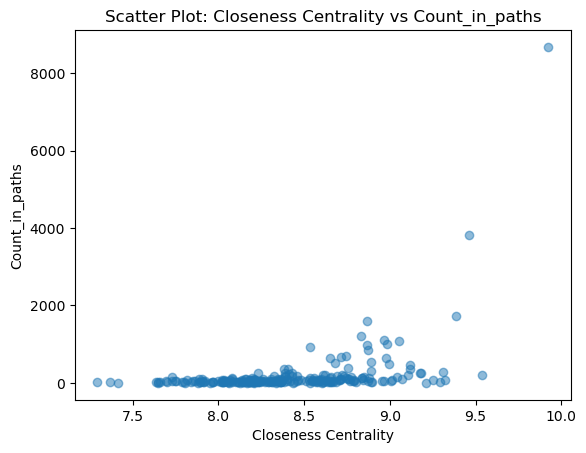

In [42]:
import matplotlib.pyplot as plt

# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df['Closeness Centrality']
y_values = df['Count_in_paths']

# Plotting
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Scatter Plot: Closeness Centrality vs Count_in_paths')
plt.xlabel('Closeness Centrality')
plt.ylabel('Count_in_paths')
plt.show()


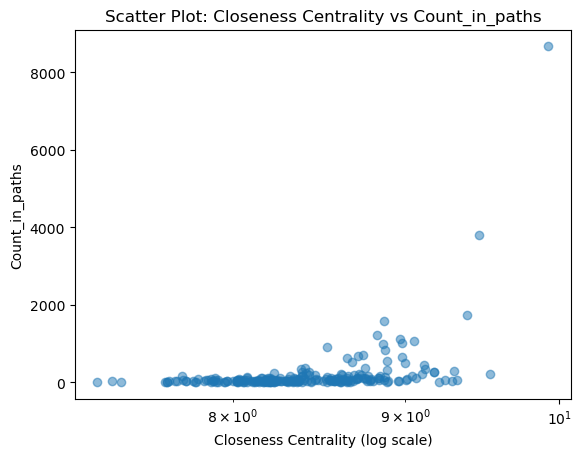

In [43]:
import matplotlib.pyplot as plt

# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df['Closeness Centrality']
y_values = df['Count_in_paths']

# Plotting
plt.scatter(x_values, y_values, alpha=0.5)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Scatter Plot: Closeness Centrality vs Count_in_paths')
plt.xlabel('Closeness Centrality (log scale)')
plt.ylabel('Count_in_paths')
plt.show()


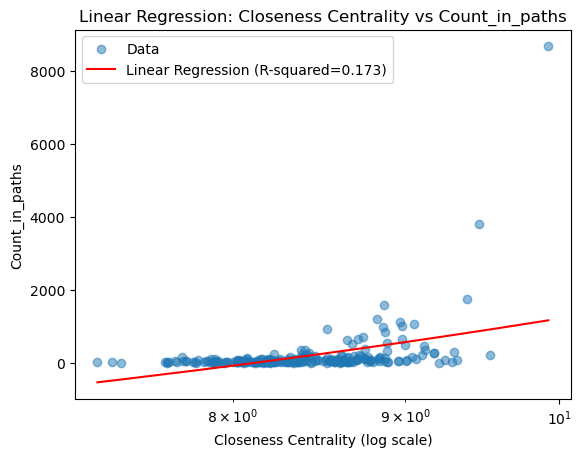

646.2425874698731 -5247.152494967644 0.4157824034713003 5.498715375783825e-11 93.82144395898493


In [44]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'Count_in_paths' and 'Closeness Centrality' are columns in your DataFrame df
x_values = df['Closeness Centrality']
y_values = df['Count_in_paths']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Plotting
plt.scatter(x_values, y_values, alpha=0.5, label='Data')
plt.plot(x_values, intercept + slope * x_values, 'r', label=f'Linear Regression (R-squared={r_value**2:.3f})')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Linear Regression: Closeness Centrality vs Count_in_paths')
plt.xlabel('Closeness Centrality (log scale)')
plt.ylabel('Count_in_paths')
plt.legend()
plt.show()

print(slope, intercept, r_value, p_value, std_err)
